#  Deep Learning and Image Recognition

## Pretrained Models for Inference

https://keras.io/applications/

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50, densenet
import matplotlib.pyplot as plt
%matplotlib inline

### Load Pretrained Model

In [3]:
# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
model = resnet50.ResNet50()
#model = densenet.DenseNet121()
model.summary()

102973440/102967424 [==============================] - 78s 1us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

### Load Image

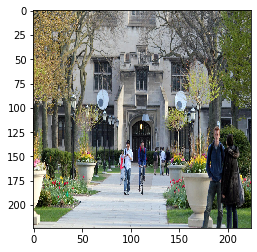

In [13]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
#img = image.load_img("images/chi.jpg", target_size=(224, 224))
img = image.load_img("../UChicago_0909.jpg", target_size=(224, 224))

plt.imshow(img)

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)

### Inference

In [14]:
# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=9)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

40960/35363 [==================================] - 0s 1us/step
This is an image of:
 - palace: 0.216900 likelihood
 - monastery: 0.176405 likelihood
 - triumphal_arch: 0.128133 likelihood
 - church: 0.079675 likelihood
 - bell_cote: 0.060900 likelihood
 - castle: 0.048271 likelihood
 - pot: 0.018394 likelihood
 - umbrella: 0.013686 likelihood
 - fountain: 0.012887 likelihood
